<a href="https://colab.research.google.com/github/JesseHenson/School/blob/main/portfolio_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, using the appropriate trained cascade classifier (Links to an external site.), write one algorithm to detect the Russian license plate in the gray scaled versions of the original images.  Put a red boundary box around the detected plate in the image in order to see what region the classifier deemed as a license plate.  If expected results are not achieved on the unprocessed images, apply processing steps before implementing the classifier for optimal results.

After the license plates have been successfully detected, you will want to process only the extracted plate region before applying character recognition on it.  Although the licence plate number classifier (Links to an external site.) is fairly accurate, it is important that all license plates are rotated and scaled so that they are horizontally aligned. If expected results are not achieved, implement more image processing for optimal character recognition.

Inspect your results and write a summary describing the techniques you used to detect and identify characters of Russian license plates in images. Reflect on the challenges you faced and how you overcame these challenges.  Furthermore, discuss in your summary, the accuracy of your results for all three images and techniques you used to improve the accuracy after each repeated experiment.

In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=b91a052f3c24365b0e6c1880687e23fc89b4e0548f8720d48c36bf1c4adb5b8e
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http:/

In [ ]:
from skimage import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import pytesseract

In [ ]:

distance_car = "https://thumbs.dreamstime.com/z/novosibirsk-russia-rear-view-white-japanese-suv-honda-cr-v-brand-spare-tire-roof-spoiler-russian-license-plate-190560545.jpg"
multi_car = "https://cdn.skoda-storyboard.com/2019/04/header-SPZ-RUS.jpg"
non_russian ="https://o.aolcdn.com/images/dims3/GLOB/legacy_thumbnail/1130x636/format/jpg/quality/85/https://s.aolcdn.com/os/ab/_cms/2021/06/29163127/License-Plates-Colo.jpg"



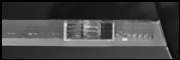

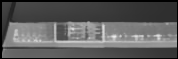

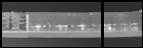

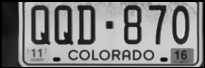

00-870



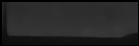

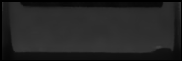

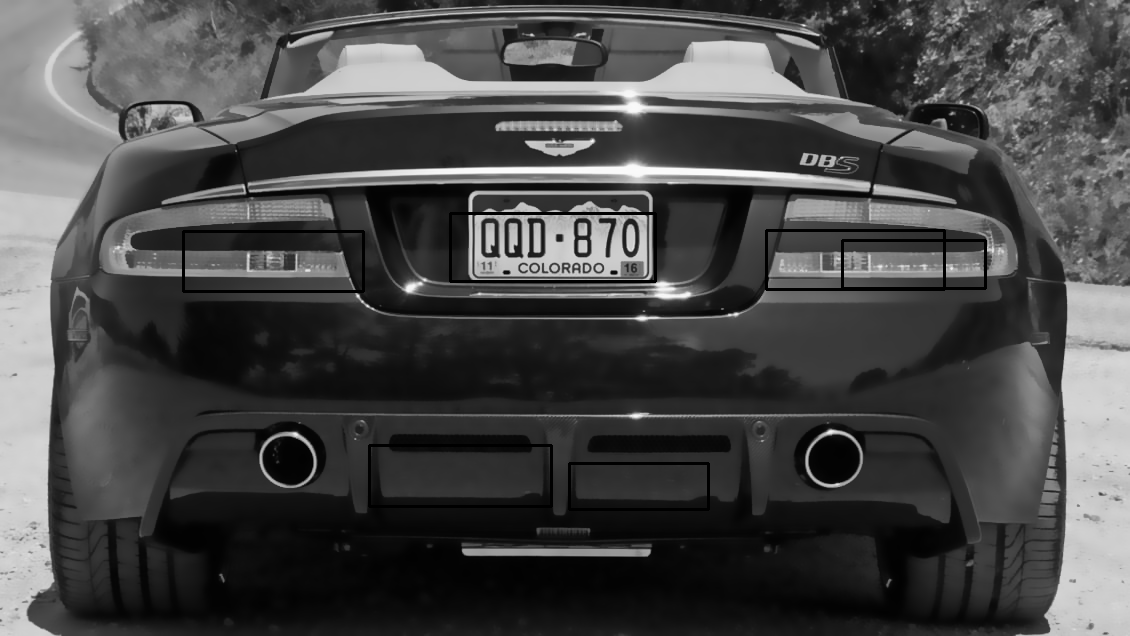

In [ ]:
# pretrained = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_russian_plate_number.xml"
# pytesseract.pytesseract.tesseract_cmd = 'System_path_to_tesseract.exe'


plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')
init_img = io.imread(non_russian)
typed_img = np.array(init_img, dtype='uint8')
grey = cv2.cvtColor(typed_img, cv2.COLOR_RGB2GRAY)
bilat = cv2.bilateralFilter(grey, 13, 15, 15)
# temp_img = cv2.Canny(temp_img, 30, 200)
plate = plate_cascade.detectMultiScale(bilat, scaleFactor = 1.05, minNeighbors = 5, minSize = (20,40))
 
#draw a rectangle around each detected face with
#the list of returned bounding box coordinates
for (x, y, w, h) in plate:
  cv2.rectangle(bilat, (x, y), (x+w, y+h), (0, 200, 255), 2) #red bounding box
  crop_img = bilat[y:y+h,x:x+w]
  cv2_imshow(crop_img)
  text = pytesseract.image_to_string(crop_img,config='--psm 11')
  print(text)
cv2_imshow(bilat)

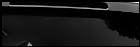

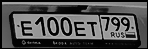

ETI99.



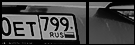

ee)



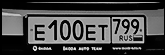

ETE 100ET/ 22h

£100

1799.



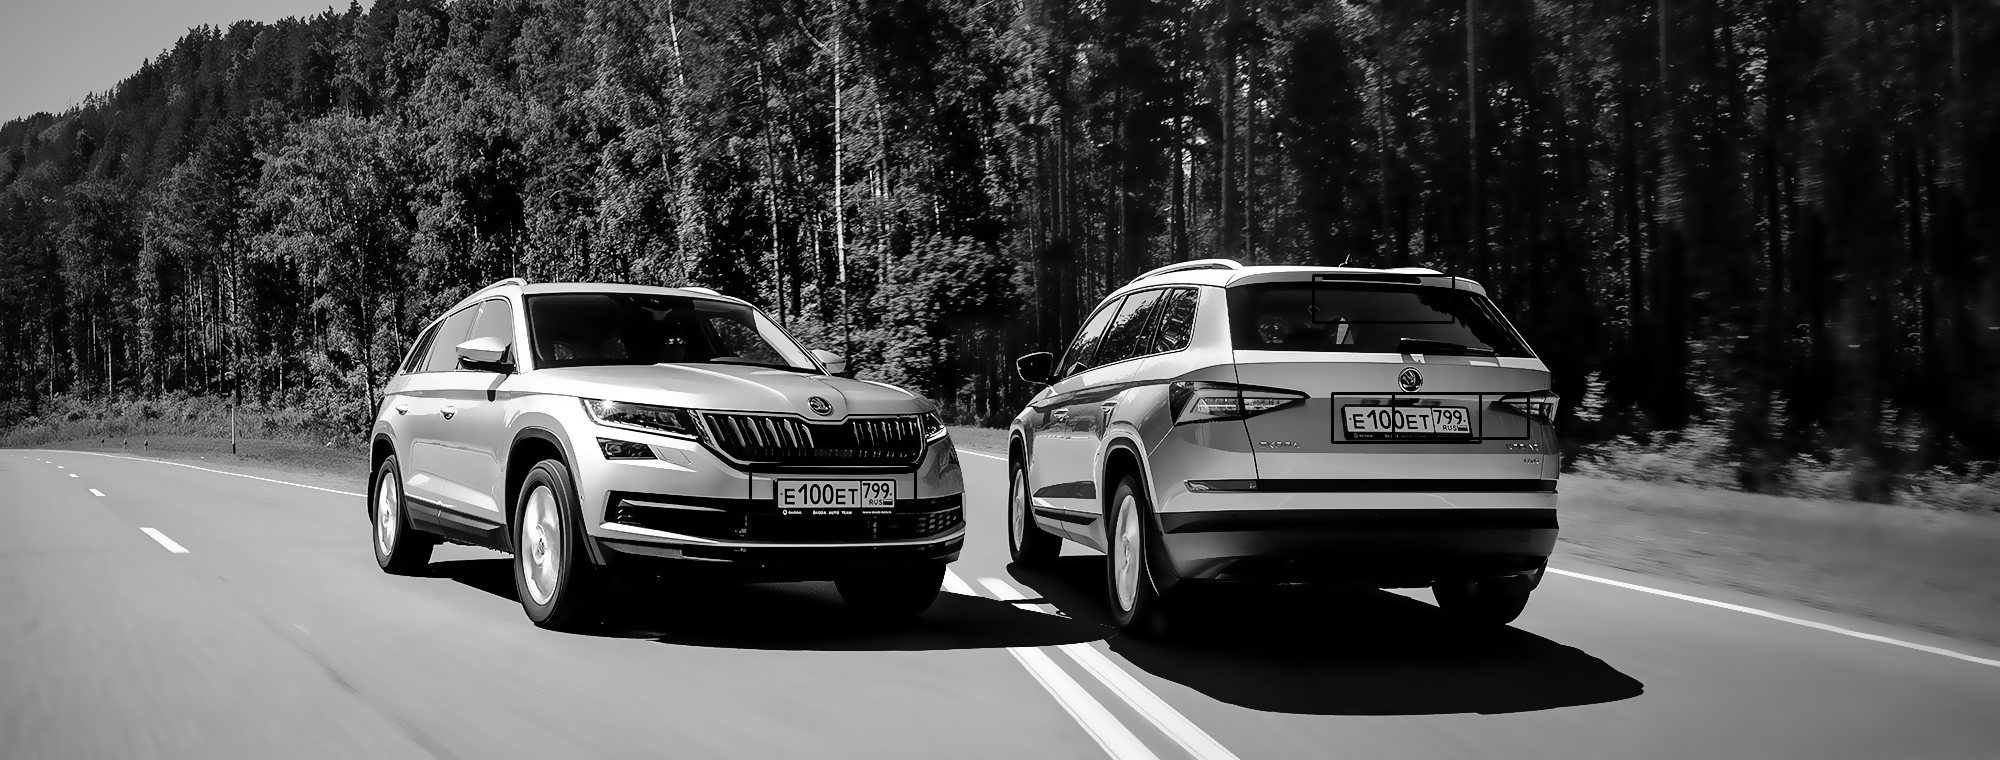

In [ ]:
plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')
init_img = io.imread(multi_car)
typed_img = np.array(init_img, dtype='uint8')
grey = cv2.cvtColor(typed_img, cv2.COLOR_RGB2GRAY)
bilat = cv2.bilateralFilter(grey, 13, 15, 15)
# temp_img = cv2.Canny(temp_img, 30, 200)
plate = plate_cascade.detectMultiScale(bilat, scaleFactor = 1.01, minNeighbors = 5, minSize = (40,40))
 
#draw a rectangle around each detected face with
#the list of returned bounding box coordinates
for (x, y, w, h) in plate:
  cv2.rectangle(bilat, (x, y), (x+w, y+h), (0, 200, 255), 2) #red bounding box
  
  crop_img = bilat[y:y+h,x:x+w]
  cv2_imshow(crop_img)
  text = pytesseract.image_to_string(crop_img,config='--psm 11')
  print(text)
cv2_imshow(bilat)

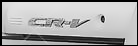

['osd', 'eng']
[crm |



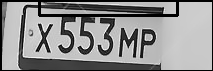

['osd', 'eng']
[XS53MP



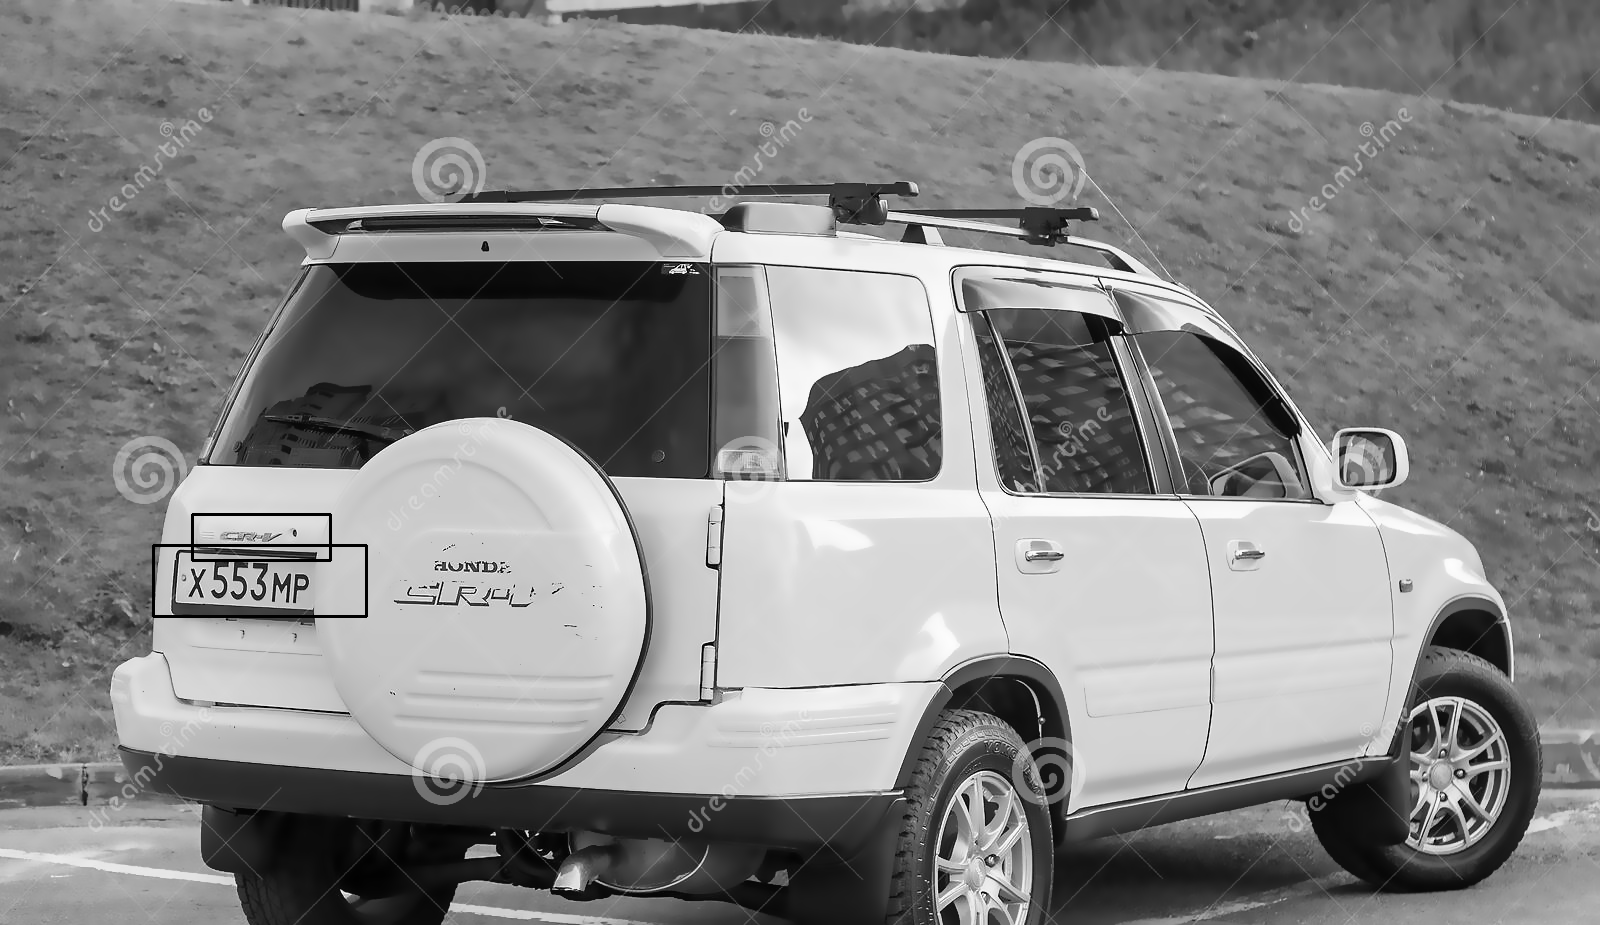

In [ ]:
plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')
init_img = io.imread(distance_car)
typed_img = np.array(init_img, dtype='uint8')
sized_img = typed_img[:int(typed_img.shape[0]*.8),:]
grey = cv2.cvtColor(sized_img, cv2.COLOR_RGB2GRAY)
bilat = cv2.bilateralFilter(grey, 13, 15, 15)
# temp_img = cv2.Canny(temp_img, 30, 200)
plate = plate_cascade.detectMultiScale(bilat, scaleFactor = 1.08, minNeighbors = 2, minSize = (40,40))
 
#draw a rectangle around each detected face with
#the list of returned bounding box coordinates
for (x, y, w, h) in plate:
  cv2.rectangle(bilat, (x, y), (x+w, y+h), (0, 200, 255), 2) #red bounding box
  crop_img = bilat[y:y+h,x:x+w]
  cv2_imshow(crop_img)
  print(pytesseract.get_languages(config=''))
  text = pytesseract.image_to_string(crop_img, config='--psm 13')
  print(text)
cv2_imshow(bilat)
